### Hierarchical Clustering

In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
from sklearn import preprocessing

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [2]:
d2 = pd.read_pickle('d2.pkl')
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 564
Columns: 159 entries, town to developer_rate
dtypes: float64(152), int64(2), object(5)
memory usage: 706.2+ KB


In [3]:
## this not needed with d2
s =pd.DataFrame([x.split(sep=',') for x in d2['city_town']])
s.columns = ['town','county','state']
s.info()
s[161:166]
## this not needed with d2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 3 columns):
town      565 non-null object
county    565 non-null object
state     565 non-null object
dtypes: object(3)
memory usage: 13.3+ KB


,town,county,state
161,Pine Valley borough,Camden County,New Jersey
162,Runnemede borough,Camden County,New Jersey
163,Somerdale borough,Camden County,New Jersey
164,Stratford borough,Camden County,New Jersey
165,Tavistock borough,Camden County,New Jersey


In [4]:
X = d2.iloc[:,5:]
X=X.set_index(d2['town'])
#X.ix[520]

In [5]:
X_scaled = preprocessing.scale(X)

X_scaled[20:21,:]    

array([[ 0.09995, -0.13182,  0.54711,  0.46604,  0.59468, -0.01877,
         0.49251,  0.03403, -0.04565, -0.54486, -0.08963, -0.80851,
        -0.74035,  2.14588, -0.42835, -0.13095, -0.3147 , -0.44093,
         0.18311, -1.15138, -0.85081, -0.72263, -0.97373, -0.92872,
        -0.99494, -0.72252,  0.85922,  3.09242, -0.25494,  0.13027,
        -0.61353,  0.54242,  0.22042, -0.44357,  0.91697,  0.5076 ,
         1.77409,  0.79908,  1.26167,  0.56416, -0.57244, -1.20674,
        -0.91617, -0.81495, -1.18953, -0.98569,  1.15838, -0.53288,
        -0.251  ,  0.20116, -0.20382, -0.28682, -0.69058, -0.12217,
         0.07995,  0.87692,  1.02122,  0.79645,  0.30647, -0.75939,
        -0.82829, -0.85316, -0.58161, -0.98402, -1.15966, -0.1586 ,
        -0.59298,  1.00656,  0.90184, -0.74725, -1.069  , -0.18066,
         0.10726, -0.41423, -0.68743,  0.02813, -0.60737, -1.11427,
        -0.73587,  0.63216, -0.09232, -0.69714,  0.47205,  0.27816,
         0.77469, -0.76788, -0.68891,  0.24114, 

In [6]:
methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

for m in methods:
    Z = linkage(X_scaled, m)
    c, coph_dists = cophenet(Z, pdist(X))
    print(m,": ", c)

#    c, coph_dists = cophenet(Z, pdist(X))
#c
#coph_dists
#c

single :  0.185360885378
complete :  0.14965937202
average :  0.201001859862
weighted :  0.308719486338
centroid :  0.188717427963
median :  0.21187565414
ward :  0.115510305121


In [32]:
from sklearn.neighbors import kneighbors_graph
# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X_scaled, 30, include_self=False)
knn_graph

<565x565 sparse matrix of type '<class 'numpy.float64'>'
	with 16950 stored elements in Compressed Sparse Row format>

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=58)
X_r = pca.fit(X_scaled).transform(X_scaled)
sum(pca.explained_variance_ratio_)

0.89999163836251184

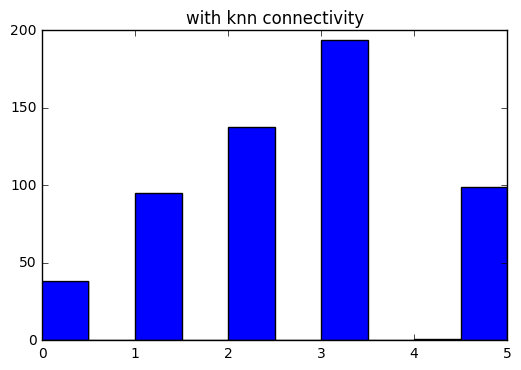

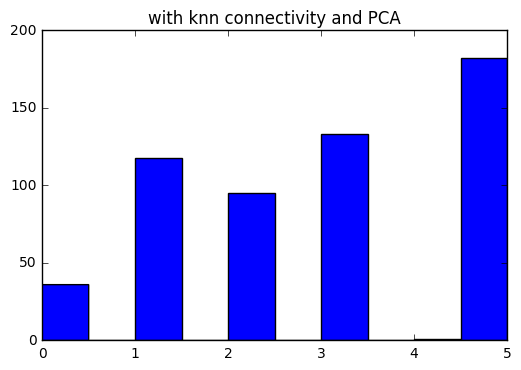

In [65]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 6
y = range(n_clusters)

model = AgglomerativeClustering(linkage='ward',
                                            connectivity=knn_graph,
                                            n_clusters=n_clusters)
clusters = model.fit_predict(X_scaled)
clustersPCA = model.fit_predict(X_r)
plt.hist(clusters);plt.title('with knn connectivity');plt.show()
plt.hist(clustersPCA);plt.title('with knn connectivity and PCA');

In [49]:
Z = linkage(X_r, 'ward')

In [50]:
Z[:10]

array([[ 310.     ,  314.     ,    3.39161,    2.     ],
       [ 146.     ,  168.     ,    4.20226,    2.     ],
       [ 460.     ,  509.     ,    4.23042,    2.     ],
       [ 423.     ,  444.     ,    4.26675,    2.     ],
       [ 411.     ,  515.     ,    4.38699,    2.     ],
       [ 148.     ,  150.     ,    4.40928,    2.     ],
       [ 481.     ,  486.     ,    4.56302,    2.     ],
       [  75.     ,   92.     ,    4.58904,    2.     ],
       [ 387.     ,  409.     ,    4.66264,    2.     ],
       [ 105.     ,  239.     ,    4.67652,    2.     ]])

In [51]:
Z[-10:]

array([[ 1110.     ,  1116.     ,    47.83746,   116.     ],
       [ 1113.     ,  1118.     ,    52.87715,   233.     ],
       [ 1090.     ,  1115.     ,    57.82789,    28.     ],
       [  520.     ,  1121.     ,    65.29492,    29.     ],
       [ 1102.     ,  1120.     ,    68.24647,   316.     ],
       [ 1117.     ,  1119.     ,    72.76798,   157.     ],
       [  542.     ,  1124.     ,    80.2966 ,   158.     ],
       [ 1114.     ,  1123.     ,    81.1893 ,   378.     ],
       [ 1122.     ,  1126.     ,    85.92049,   407.     ],
       [ 1125.     ,  1127.     ,   141.34727,   565.     ]])

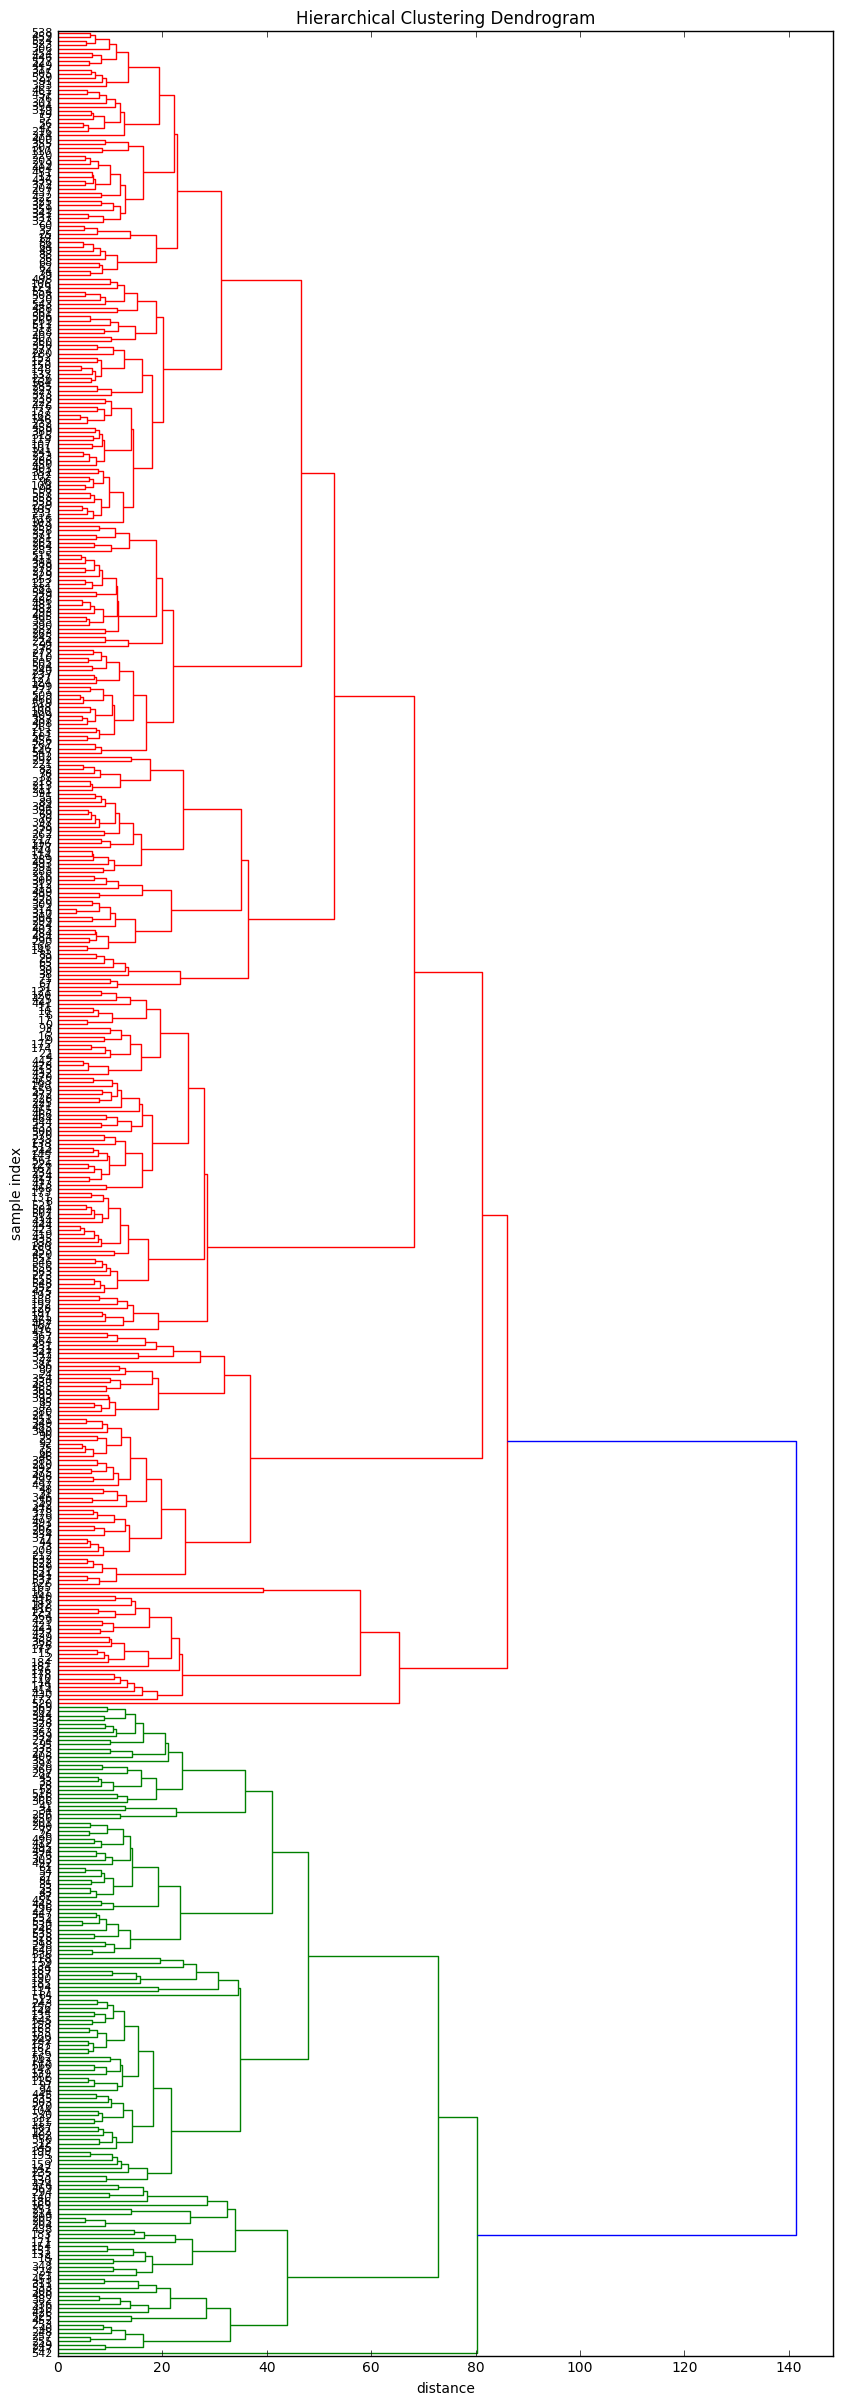

In [52]:
# calculate full dendrogram
plt.figure(figsize=(10, 30))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('sample index')
plt.xlabel('distance')
dendrogram(
    Z,
    orientation='right',
#    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


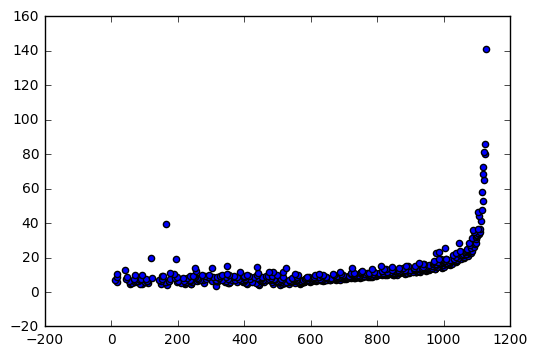

In [53]:
np.shape(Z)
plt.scatter(Z[:,1],Z[:,2])

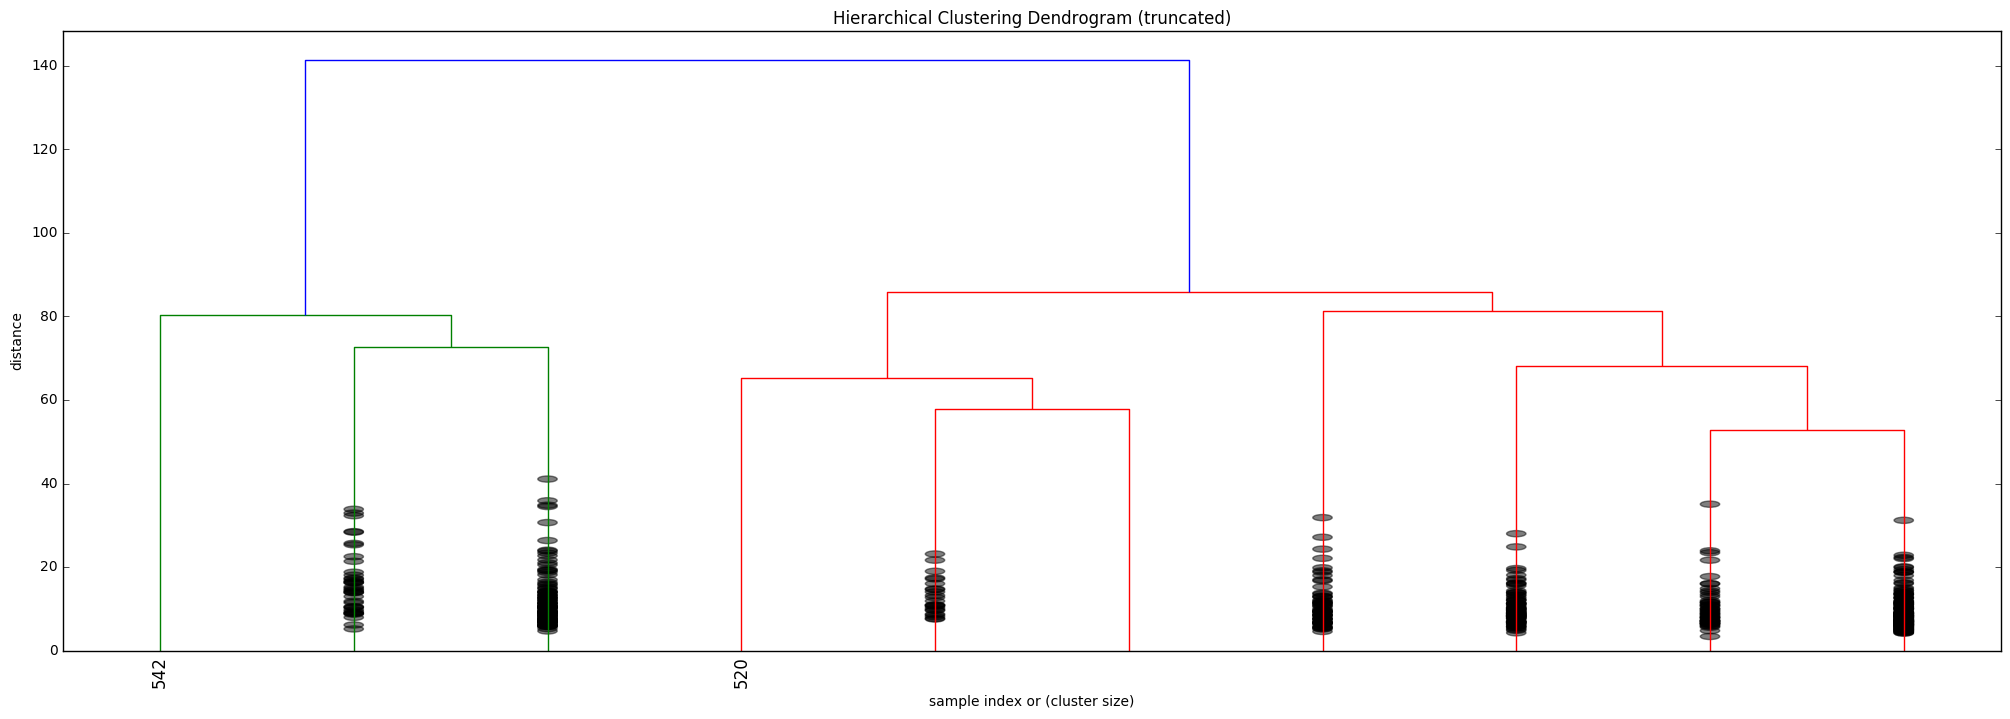

In [54]:
plt.figure(figsize=(25, 8))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [55]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

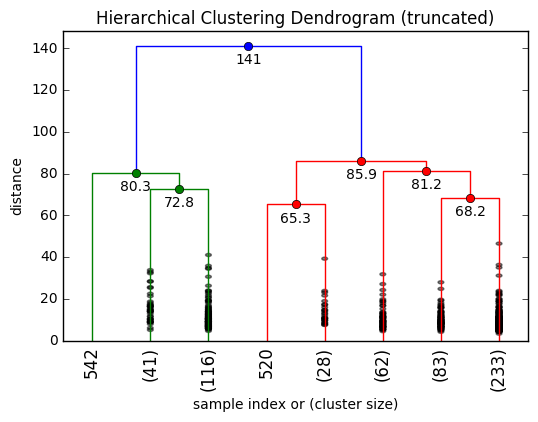

In [59]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=8,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

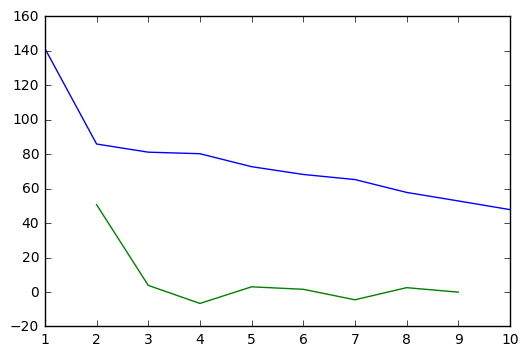

clusters: 2


In [57]:
## Elbow Method

last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

In [58]:
from scipy.cluster.hierarchy import fcluster
max_d = 68
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([6, 1, 4, 2, 6, 6, 6, 1, 6, 6, 6, 6, 2, 7, 4, 4, 6, 6, 1, 7, 2, 1, 6,
       5, 5, 7, 2, 2, 2, 7, 7, 5, 7, 2, 2, 2, 7, 7, 7, 7, 1, 2, 5, 2, 5, 2,
       5, 7, 5, 7, 5, 7, 2, 2, 2, 7, 7, 7, 7, 2, 7, 2, 7, 7, 7, 7, 5, 7, 7,
       7, 7, 7, 2, 5, 7, 5, 7, 5, 7, 7, 5, 2, 7, 7, 2, 5, 7, 2, 7, 7, 5, 7,
       5, 6, 2, 2, 7, 2, 7, 7, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 7, 2, 7, 7, 7,
       2, 7, 2, 2, 7, 6, 6, 2, 7, 7, 4, 7, 7, 6, 7, 2, 6, 1, 7, 2, 2, 2, 7,
       6, 2, 1, 7, 2, 2, 2, 6, 7, 2, 7, 7, 7, 1, 7, 2, 1, 2, 2, 2, 2, 2, 2,
       4, 2, 2, 7, 4, 7, 6, 7, 1, 4, 1, 4, 6, 6, 6, 4, 4, 4, 4, 6, 4, 4, 1,
       4, 2, 1, 2, 6, 2, 2, 6, 6, 6, 2, 2, 6, 6, 6, 2, 2, 2, 2, 7, 1, 1, 5,
       7, 5, 1, 5, 7, 5, 7, 1, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 7, 6, 7,
       7, 7, 7, 6, 6, 2, 7, 7, 7, 7, 7, 7, 2, 2, 6, 7, 2, 1, 1, 1, 2, 1, 2,
       1, 7, 1, 2, 1, 7, 7, 7, 7, 7, 7, 7, 7, 2, 7, 7, 7, 2, 7, 7, 6, 2, 2,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 7, 1, 7, 2, 5, 2,
       7, 7,

In [17]:
from collections import defaultdict
cluster_dict = defaultdict(list)
for i, c in enumerate(clusters):
    cluster_dict[c].append(i)
#print(cluster_dict)
cluster_dict[1][3]

3

In [91]:
for i in range(len(cluster_dict[1])):
    print(d2.iloc[cluster_dict[1][i],0])

Atlantic City city
Buena borough
Egg Harbor City city
Pleasantville city
Somers Point city
Ventnor City city
Bergenfield borough
Bogota borough
Carlstadt borough
Cliffside Park borough
Dumont borough
East Rutherford borough
Elmwood Park borough
Englewood city
Fairview borough
Garfield city
Hackensack city
Little Ferry borough
Lodi borough
Lyndhurst township
New Milford borough
North Arlington borough
Ridgefield Park village
South Hackensack township
Teterboro borough
Wallington borough
Beverly city
Bordentown city
Burlington city
Edgewater Park township
Maple Shade township
Mount Holly township
Pemberton borough
Pemberton township
Riverside township
Willingboro township
Wrightstown borough
Audubon Park borough
Barrington borough
Bellmawr borough
Brooklawn borough
Camden city
Chesilhurst borough
Clementon borough
Collingswood borough
Gloucester City city
Hi-Nella borough
Lawnside borough
Lindenwold borough
Magnolia borough
Merchantville borough
Mount Ephraim borough
Pennsauken township


In [43]:
d2.iloc[[161,165,520,542],:]

,town,county,state,FIPS,city_town,p_in_lab,p_unemployed,p_fem_labforce,p_fem_employed,p_ch6_paremp,...,CYCountyEQTaxRate,CYSchoolEQTaxRate,CYLocalPurposeMunicipalEQTaxRate,CYTotalMunicipalEQRate,CYTotalEQRate(REAPNotIncluded),num_badge,num_train_stat,management_rate,teacher_rate,developer_rate
161,Pine Valley borough,Camden County,New Jersey,3400758920,"Pine Valley borough, Camden County, New Jersey",50.0,0.0,0.0,0.0,0.0,...,0.878,0.000,0.796,0.796,1.674,1.0,0.0,6.908755,0.0,0.0
165,Tavistock borough,Camden County,New Jersey,3400772240,"Tavistock borough, Camden County, New Jersey",71.4,0.0,50.0,50.0,0.0,...,0.900,0.237,0.680,0.680,1.817,1.0,0.0,0.000000,0.0,0.0
520,Walpack township,Sussex County,New Jersey,3403776640,"Walpack township, Sussex County, New Jersey",44.4,0.0,28.6,28.6,0.0,...,0.558,1.641,0.000,0.000,2.199,0.0,0.0,0.000000,0.0,0.0
542,Winfield township,Union County,New Jersey,3403981650,"Winfield township, Union County, New Jersey",69.0,7.2,64.8,58.6,50.6,...,0.538,9.417,8.719,8.719,18.674,0.0,0.0,0.000000,0.0,0.0
